In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
import math
from scipy.signal import decimate, convolve

In [ ]:
RawData = "rawdata/probeX.data"
f = open(RawData, "r")
a = np.fromfile(f, dtype=np.uint32)
t = a[-1]
V = a[:-1].copy()
T = [ (( x * t ) / ( 1000.0*len(V) )) for x in 2*range(len(V))]
Fech = 1000.0*len(V)/t # in MHz

In [ ]:
#ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC2_pins = [38,37,36,35,33,32,26,24,23]

#ADC1_GPIO = [9, 25,10,22,27,17,18,15,14]
ADC1_GPIO =  [9 ,25,10,22,27,17,18,15,14]

ADC2_GPIO = [20,26,16,19,13,12, 7, 8,11]

ADC1len = len(ADC1_GPIO)
ADC2len = len(ADC2_GPIO)


def GetV2(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC2len), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        SignalZero = 0
        for k in range(ADC2len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC2len):
            SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map



def GetV1(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC1len), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        SignalZero = 0
        for k in range(ADC1len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC1len):
            SignalZero += 2**k*((val & 2**ADC1_GPIO[k])/2**ADC1_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map

In [ ]:
M = GetV2(V)[0]
M2 = GetV1(V)[0]
Ma = M - np.average(M[5000:7000])
Mb = M2 - np.average(M2[5000:7000])

In [ ]:
tt = 170*5000
plt.figure(figsize=(15,5))
plt.plot(T[tt+0:tt+15000],Ma[tt+0:tt+15000],"r")
plt.plot(T[tt+0:tt+15000],Mb[tt+0:tt+15000],"b")
plt.title("Plots "+RawData+' .') 
#plt.savefig('twoADCs'+RawData.split("/")[-1]+'.png', bbox_inches='tight')
plt.show()

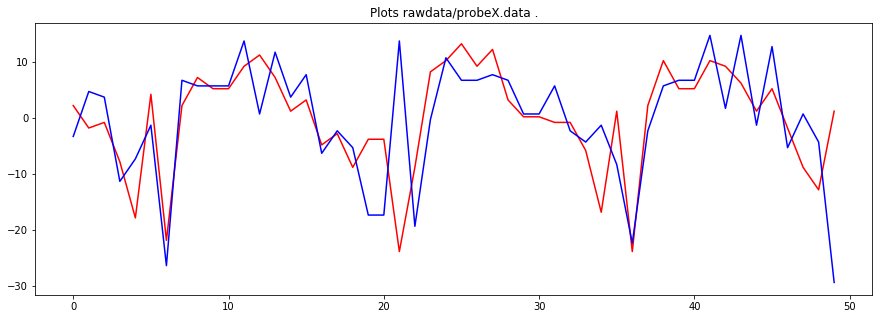

In [60]:
plt.figure(figsize=(15,5))
plt.plot(Ma[900:950],"r")
plt.plot(Mb[900:950],"b")
plt.title("Plots "+RawData+' .') 
#plt.savefig('Raw signal '+RawData.split("/")[-1]+'.png', bbox_inches='tight')
plt.show()

In [61]:
rawSig = []
for k in range(len(Ma)):
    rawSig.append(Mb[k])
    rawSig.append(Ma[k])

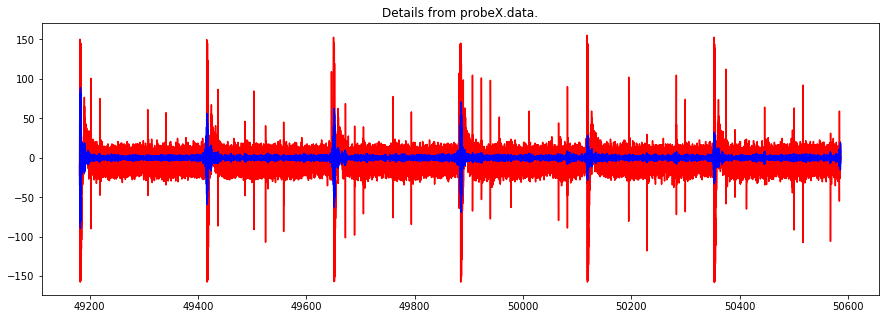

In [76]:
tt = 210*2500
plt.figure(figsize=(15,5))
TT = np.divide(T,2.0)
plt.plot(TT[2*tt:2*tt+2*15000],rawSig[2*tt:2*tt+2*15000],"r")
plt.plot(TT[2*tt:2*tt+2*15000],np.real(np.fft.ifft(FFTCleaned))[2*tt:2*tt+2*15000],"b")
plt.title("Details from "+RawData.split("/")[-1]+".")  
plt.savefig('datas_'+RawData.split("/")[-1]+'.jpg', bbox_inches='tight')
plt.show()

In [79]:
FFT = abs(np.fft.fft(rawSig))
FFTCleaned = np.fft.fft(rawSig)
for k in range(len(FFTCleaned)/2):
    if (k < 550000 or k > 790000):
        FFTCleaned[k] = 0
        FFTCleaned[-k] = 0
    
Scale = max(FFT)
ff = [ Fech*2.0*x/(2*len(V)) for x in range(len(V))]

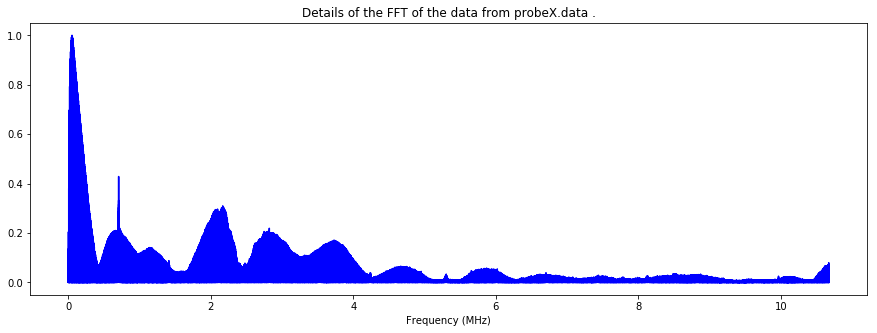

In [64]:
plt.figure(figsize=(15,5))
plt.plot(ff,FFT[0:len(FFT)/2]/Scale,"b")
plt.title("Details of the FFT of the data from "+RawData.split("/")[-1]+" .")  
plt.xlabel("Frequency (MHz)")
plt.savefig('fft_'+RawData.split("/")[-1]+".jpg", bbox_inches='tight')
plt.show()

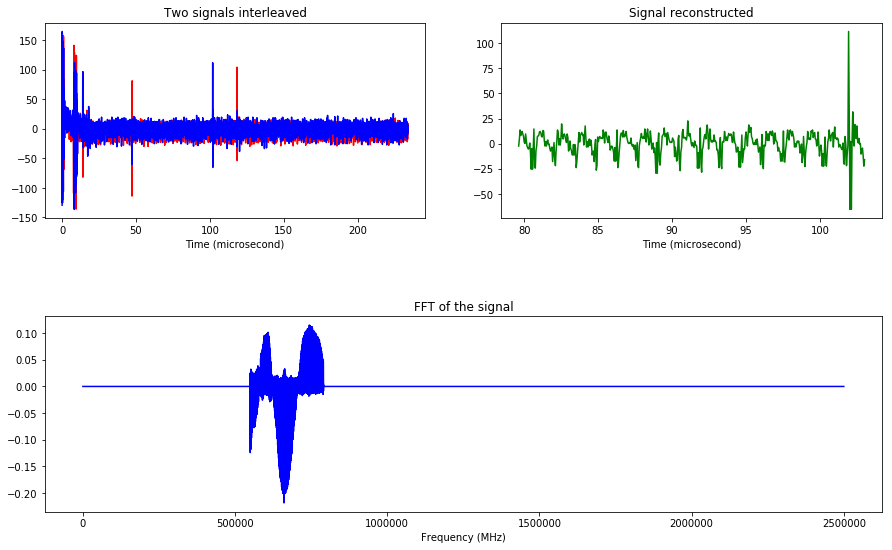

In [81]:
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=.5)
plt.subplot(221)
plt.plot(T[0:2500],Ma[0:2500],"r")
plt.plot(T[0:2500],Mb[0:2500],"b")
plt.title("Two signals interleaved")
plt.xlabel("Time (microsecond)")
plt.subplot(222)
plt.plot(TT[1700:2200],rawSig[1700:2200],"g")
plt.title("Signal reconstructed")
plt.xlabel("Time (microsecond)")
plt.subplot(212)
plt.plot(FFTCleaned[0:len(FFT)/2]/Scale,"b")
plt.title("FFT of the signal")  
plt.xlabel("Frequency (MHz)")
plt.show()

In [101]:
F = np.real(np.fft.ifft(FFTCleaned))
FH = np.asarray(np.abs(signal.hilbert(F)))

tableData = np.asarray(FH).reshape((1000,2*2500))

In [85]:
tableData = np.asarray(rawSig).reshape((1000,2*2500))

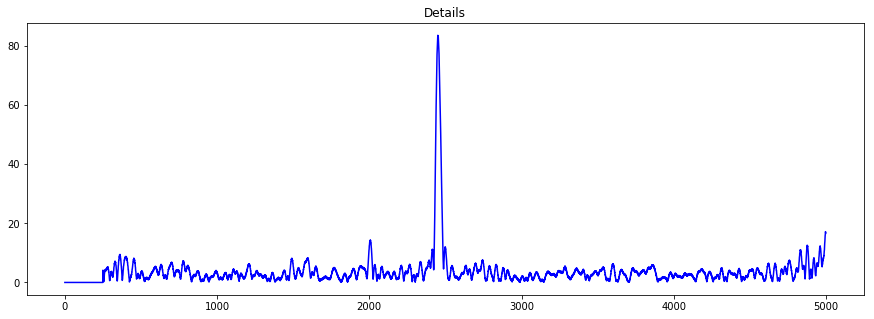

In [104]:
ExLine = tableData[100]
plt.figure(figsize=(15,5))
plt.plot(ExLine[0:5000],"b")
plt.title("Details")  
plt.show()

In [68]:
ImageClean = []
for k in range(1000):
    LineNb = k
    ExFFT = np.fft.fft(tableData[LineNb])
    for k in range(len(ExFFT)/2+1):
        if (k < 400 or k > 1200):
            ExFFT[k]=0
            ExFFT[-k]=0
    LineClean = np.real(np.fft.ifft(ExFFT))
    for m in range(250):
        LineClean[m] = 0
    ImageClean.append(np.asarray(np.abs(signal.hilbert(LineClean))))
ImageClean = np.asarray(ImageClean)

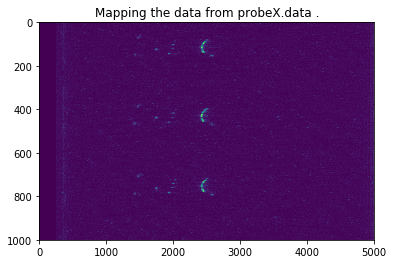

In [102]:
for m in range(250):
    for k in range(1000):
        tableData[k][m] = 0.0
plt.imshow((abs(tableData)), aspect='auto')
plt.title("Mapping the data from "+RawData.split("/")[-1]+" .")  
plt.savefig('map_'+RawData.split("/")[-1]+".jpg", bbox_inches='tight')
plt.show()

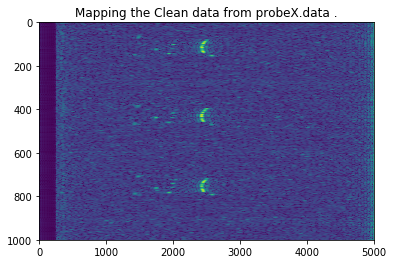

In [70]:
plt.imshow(np.sqrt(abs(ImageClean)), aspect='auto')
plt.title("Mapping the Clean data from "+RawData.split("/")[-1]+" .")  
plt.savefig('mapClean_'+RawData.split("/")[-1]+".jpg", bbox_inches='tight')
plt.show()

array([[  8.26227516e+00,   2.78501072e+00,   2.47383976e+00, ...,
          2.78283299e+01,   2.50372588e+01,   1.77825474e+01],
       [  3.17799879e+00,   1.58574267e+00,   1.64859081e+00, ...,
          1.54229559e+01,   7.62098112e+00,   3.55735605e+00],
       [  9.23503362e-01,   4.70124056e+00,   1.17882510e+00, ...,
          3.13958424e+01,   2.91090217e+01,   1.53902886e+01],
       ..., 
       [  3.35490796e+00,   3.65648532e+00,   1.98501281e-03, ...,
          2.62011671e+01,   2.59968222e+01,   1.59125746e+01],
       [  1.87121231e+00,   3.34910738e+00,   2.12100374e-01, ...,
          1.89115558e+01,   2.05837191e+01,   1.24708357e+01],
       [  6.30886238e+00,   1.43778489e+00,   1.20357370e+00, ...,
          1.94242996e+01,   1.98069115e+01,   1.54440237e+01]])

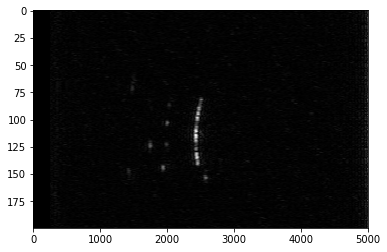

In [88]:
Start =0
Stop = 200
TmpImg = (abs(tableData[Start:Stop]))**(1.3)
plt.imshow(TmpImg,cmap=plt.get_cmap('gray'), aspect='auto')
plt.savefig('mapCleanImage_'+RawData.split("/")[-1]+str(Start)+"-"+str(Stop)+".jpg", bbox_inches='tight')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in power


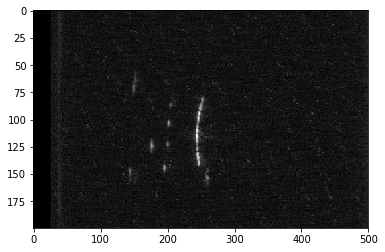

In [105]:
DecImg = []
for i in range(200):
    DecImg.append(decimate(tableData[i], 10, ftype='fir'))
    
plt.imshow(np.asarray(DecImg)**(0.7),cmap=plt.get_cmap('gray'), aspect='auto')
plt.savefig('mapCleanImageDec_'+RawData.split("/")[-1]+str(Start)+"-"+str(Stop)+".jpg", bbox_inches='tight')
plt.show()

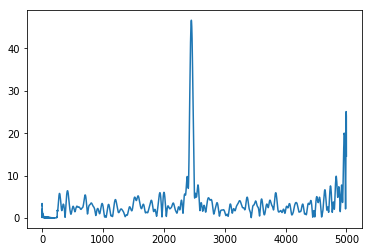

In [94]:
plt.plot(ImageClean[100])
plt.show()

In [73]:
def CreateSC(RawImgData,NbLinesC):
    LenLinesC = np.shape(RawImgData)[1]

    SC = np.zeros((LenLinesC,LenLinesC))
    SC += 1
    maxAngle = 60.0
    step = maxAngle/(NbLinesC+1)
    CosAngle = math.cos(math.radians(30))
    Limit = LenLinesC*CosAngle

    points = []
    values = []

    for i in range(LenLinesC):
        for j in range(LenLinesC):
            if (  (j > LenLinesC/2 + i/(2*CosAngle)) or  (j < LenLinesC/2 - i/(2*CosAngle)) ):
                SC[i][j] = 0
                points.append([i,j])
                values.append(0)
            if (  (i > Limit) ):
                if ( (i**2 + (j-LenLinesC/2) ** 2) > LenLinesC**2):
                    SC[i][j] = 0 
                    points.append([i,j])
                    values.append(0)
    for i in range(NbLinesC):
        PointAngle = i*step-30
        COS = math.cos(math.radians(PointAngle))
        SIN = math.sin(math.radians(PointAngle))
        for j in range(LenLinesC):

            X = (int)( j*COS)
            Y = (int)(LenLinesC/2 - j*SIN)
            SC[X][Y] = RawImgData[i][j]
            points.append([X,Y])
            values.append(RawImgData[i][j])

    values = np.array(values,dtype=np.int)
    
    return SC,values,points,LenLinesC